In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import f_regression, mutual_info_regression
from termcolor import colored

In [11]:
# Carga de datos.
np.random.seed(42)
X = np.random.rand(10000, 3)
print(X)
print(np.shape(X))

[[0.37454012 0.95071431 0.73199394]
 [0.59865848 0.15601864 0.15599452]
 [0.05808361 0.86617615 0.60111501]
 ...
 [0.77707099 0.15825956 0.12330421]
 [0.2693165  0.95227545 0.74782421]
 [0.01945586 0.40100484 0.25739798]]
(10000, 3)


In [12]:
# Definimos la etiqueta (target, ground truth) haciéndola dependiente de las características x1 y x2
y = X[:, 0] + np.sin(6 * np.pi * X[:, 1]) + 0.1 * np.random.randn(10000)

F-Regression

In [13]:
# Evaluación de atributos: F-Test.
f_test, p_value = f_regression(X, y) # Llamamos al estadístico F
# f_test /= np.max(f_test) # Normalizamos

# Definimos el valor de significancia (alpha)
alpha = 0.05

# Definimos la decisión de si aceptamos o rechazamos la hipótesis nula (Ho) para cada variable
for i in range(len(p_value)):
    p_val = p_value[i]

    if p_val < alpha:
        h = 1   # Se rechaza la hipótesis nula que defiende la independencia entre variables. Por tanto, dependientes
        print(colored('La variable ' + str(i) + 'es linealmente DEPENDIENTE de la clase. p-value: ' + str(p_val), 'green'))
    else:
        h = 0   # No hay evidencia estadística para rechazar la hipótesis nula, por tanto, se asume independencia entre variables
        print(colored('La variable ' + str(i) + 'es linealmente INDEPENDIENTE de la clase. p-value: ' + str(p_val), 'red'))

La variable 0es linealmente DEPENDIENTE de la clase. p-value: 8.05e-322
La variable 1es linealmente DEPENDIENTE de la clase. p-value: 6.627405408273037e-148
La variable 2es linealmente INDEPENDIENTE de la clase. p-value: 0.27094893348858856


Mutual information

In [14]:
# Evaluación de atributos: información mutua.
mutual_info = mutual_info_regression(X, y)

# Definimos un umbral de aceptación
th = 0.7

# Definimos la decisión de si aceptamos o rechazamos la hipótesis nula (Ho) para cada variable
for i in range(len(mutual_info)):
    mi = mutual_info[i]

    if mi > th:
        h = 1
        print(colored('Asumimos la variable ' + str(i) +
                      'como DEPENDIENTE de la clase, ya que el valor de MI = ' + str(np.round(mi, 4)) +
                      'es superior al umbral establecido', 'green'))
    else:
        h = 0   # No hay evidencia estadística para rechazar la hipótesis nula, por tanto, se asume independencia entre variables
        print(colored('Asumimos la variable ' + str(i) +
                      'como INDEPENDIENTE de la clase, ya que el valor de MI = ' + str(np.round(mi, 4)) +
                      'es inferior al umbral establecido', 'red'))

Asumimos la variable 0como INDEPENDIENTE de la clase, ya que el valor de MI = 0.2494es inferior al umbral establecido
Asumimos la variable 1como DEPENDIENTE de la clase, ya que el valor de MI = 0.9104es superior al umbral establecido
Asumimos la variable 2como INDEPENDIENTE de la clase, ya que el valor de MI = 0.0es inferior al umbral establecido


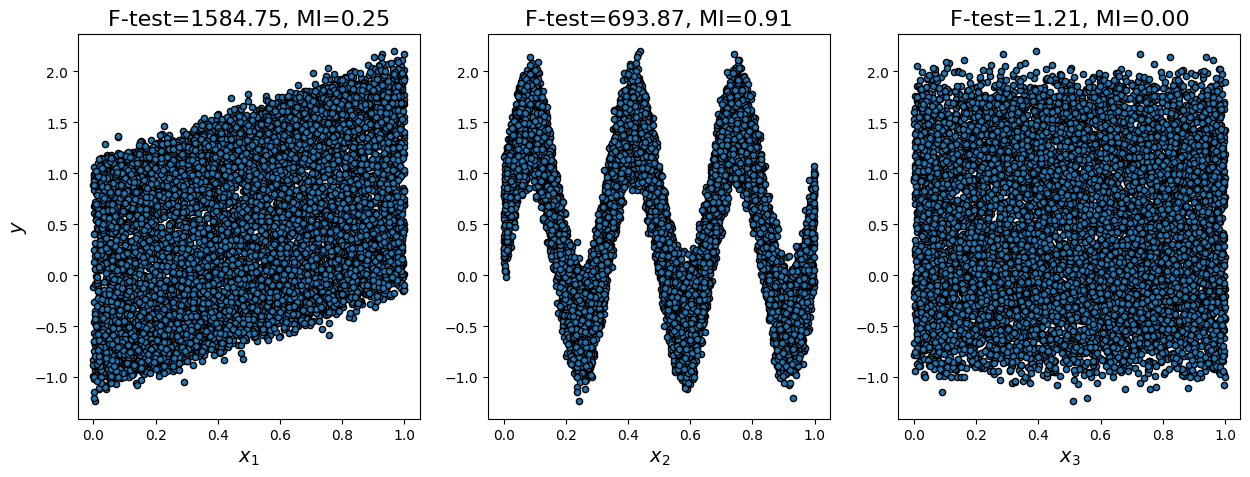

In [15]:
# Graficamos la distribución de los datos y evaluación de atributos.
plt.figure(figsize=(15, 5))
for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.scatter(X[:, i], y, edgecolor='black', s=20)
    plt.xlabel("$x_{}$".format(i + 1), fontsize=14)
    if i == 0:
        plt.ylabel("$y$", fontsize=14)
    plt.title("F-test={:.2f}, MI={:.2f}".format(f_test[i],
              mutual_info[i]), fontsize=16)
plt.show()